# Read me

If you want to start with pre-filtered data set, start with import section and then skip everything until "3. Starting point". Start from there

# 0. Import section

In [1]:
!pip3 download nltk
!pip3 install nltk
!pip3 download seaborn
!pip3 install seaborn
!pip3 install gensim
!pip3 install pyLDAvis
!pip3 install pyLDAvis.gensim

import pandas as pd
import math
import time
import os
import numpy as np
import matplotlib as plt
import seaborn as sns 
import nltk
import gensim 
import re
from nltk.corpus import stopwords
from nltk import word_tokenize, WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary
from gensim import corpora, models
from pprint import pprint
from sklearn.model_selection import train_test_split

!pip3 install imblearn
from imblearn.over_sampling import RandomOverSampler


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

  File was already downloaded /Users/Felix/Downloads/nltk-3.8.1-py3-none-any.whl
  File was already downloaded /Users/Felix/Downloads/click-8.1.3-py3-none-any.whl
  File was already downloaded /Users/Felix/Downloads/tqdm-4.65.0-py3-none-any.whl
  File was already downloaded /Users/Felix/Downloads/regex-2023.5.5-cp310-cp310-macosx_10_9_x86_64.whl
  File was already downloaded /Users/Felix/Downloads/joblib-1.2.0-py3-none-any.whl
Successfully downloaded nltk regex click joblib tqdm

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
  File was already downloaded /Users/Felix/Downloads/seaborn-0.12.2-py3-none-any.whl
  File was already downloaded /Users/Felix/Downloads/matplotlib-3.7.1-cp310-cp310-macosx_10_12_x86_64.whl
  File was already downloaded /Users/Felix/Downloads/numpy-1.24.3-cp310-cp310

[nltk_data] Downloading package stopwords to /Users/Felix/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Felix/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Felix/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 1. Cleaning big data set

In [2]:
newspaper_df = pd.read_csv('/Users/Felix/Desktop/GitHub/NLP_finalproject/newspaper_data.csv')
newspaper_df.head()

,date,year,month,day,author,title,article,url,section,publication
0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox
1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,NaN,Business Insider
2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters
3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters
4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,NaN,TMZ


In [ ]:
#give me the shape of newspaper_df
newspaper_df.shape

(2688878, 10)

In [3]:
newspaper_df.head()

,date,year,month,day,author,title,article,url,section,publication
0,2016-12-09 18:31:00,2016,12.0,9,Lee Drutman,We should take concerns about the health of li...,"This post is part of Polyarchy, an independent...",https://www.vox.com/polyarchy/2016/12/9/138983...,NaN,Vox
1,2016-10-07 21:26:46,2016,10.0,7,Scott Davis,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,https://www.businessinsider.com/colts-gm-ryan-...,NaN,Business Insider
2,2018-01-26 00:00:00,2018,1.0,26,NaN,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",https://www.reuters.com/article/us-davos-meeti...,Davos,Reuters
3,2019-06-27 00:00:00,2019,6.0,27,NaN,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,https://www.reuters.com/article/france-politic...,World News,Reuters
4,2016-01-27 00:00:00,2016,1.0,27,NaN,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,https://www.tmz.com/2016/01/27/paris-hilton-mo...,NaN,TMZ


In [ ]:
#give me the different potential values for the column publication
print(newspaper_df['publication'].unique())
len(newspaper_df['publication'].unique())

['Vox' 'Business Insider' 'Reuters' 'TMZ' 'Vice' 'Vice News'
 'Hyperallergic' 'TechCrunch' 'Axios' 'Refinery 29' 'The Verge' 'Mashable'
 'People' 'Economist' 'CNN' 'Gizmodo' 'New Yorker' 'CNBC' 'Wired'
 'New Republic' 'Fox News' 'The Hill' 'Politico' 'The New York Times'
 'Buzzfeed News' 'Washington Post' nan]


27

In [ ]:
#show me the distribution of the column over gteh different values for publication
newspaper_df['publication'].value_counts()

Reuters               840094
The New York Times    252259
CNBC                  238096
The Hill              208411
People                136488
CNN                   127602
Refinery 29           111433
Vice                  101137
Mashable               94107
Business Insider       57953
The Verge              52424
TechCrunch             52095
TMZ                    49595
Axios                  47815
Vox                    47272
Politico               46377
Washington Post        40882
Buzzfeed News          32819
Gizmodo                27228
Economist              26227
Wired                  20243
Fox News               20144
Vice News              15539
Hyperallergic          13551
New Republic           11809
New Yorker              4701
Name: publication, dtype: int64

In [ ]:
relevant = ['TMZ', 'Economist', 'CNN', 'CNBC', 'Fox News', 'Reuters', 'The New York Times','Washington Post', 'Business Insider']

In [ ]:
columns_to_keep = ['year', 'title', 'article', 'publication']

In [ ]:
#create new data frame that is reduced to the relevant publications and columns to keep
newspaper_df = newspaper_df[newspaper_df['publication'].isin(relevant)][columns_to_keep]

# 2. EDA of cleaned data set

## 2.1 General information

In [ ]:
newspaper_df.head()

,year,title,article,publication
1,2016,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,Business Insider
2,2018,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",Reuters
3,2019,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,Reuters
4,2016,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,TMZ
5,2019,"ECB's Coeure: If we decide to cut rates, we'd ...","BERLIN, June 17 (Reuters) - ECB board member B...",Reuters


In [ ]:
newspaper_df.shape

(1652852, 4)

In [ ]:
newspaper_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1652852 entries, 1 to 2688877
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   year         1652852 non-null  int64 
 1   title        1652816 non-null  object
 2   article      1587777 non-null  object
 3   publication  1652852 non-null  object
dtypes: int64(1), object(3)
memory usage: 63.1+ MB


In [ ]:
newspaper_df.isnull().sum()

year               0
title             36
article        65075
publication        0
dtype: int64

In [ ]:
#show me the distribution of isnull in article over publication
newspaper_df[newspaper_df['article'].isnull()]['publication'].value_counts()

Washington Post       37550
Reuters               14958
CNBC                   3955
The New York Times     3173
Economist              3027
CNN                    2302
TMZ                      91
Business Insider         19
Name: publication, dtype: int64

In [ ]:
#delete all rows where article and title is null
newspaper_df = newspaper_df.dropna(subset=['article', 'title'])

In [ ]:
#show me the distribution of the column over the different values for publication
newspaper_df['publication'].value_counts()


Reuters               825136
The New York Times    249072
CNBC                  234139
CNN                   125300
Business Insider       57934
TMZ                    49504
Economist              23200
Fox News               20144
Washington Post         3332
Name: publication, dtype: int64

In [ ]:
newspaper_df.shape

(1587761, 4)

## 2.2 Plots

<AxesSubplot: >

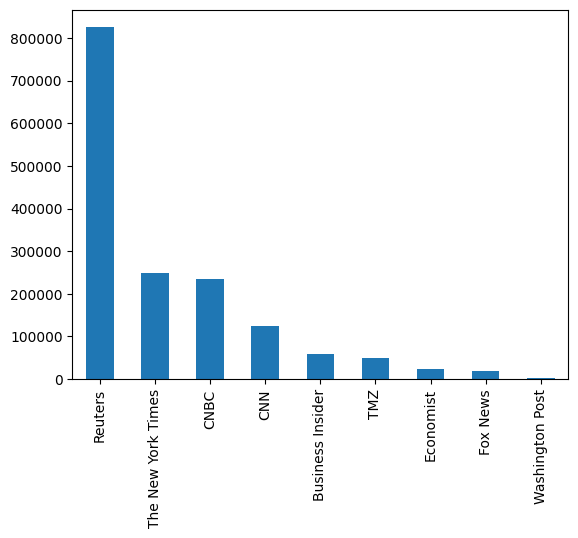

In [ ]:
#plot the distribution of the column over the different values for publication
newspaper_df['publication'].value_counts().plot(kind='bar')

<AxesSubplot: >

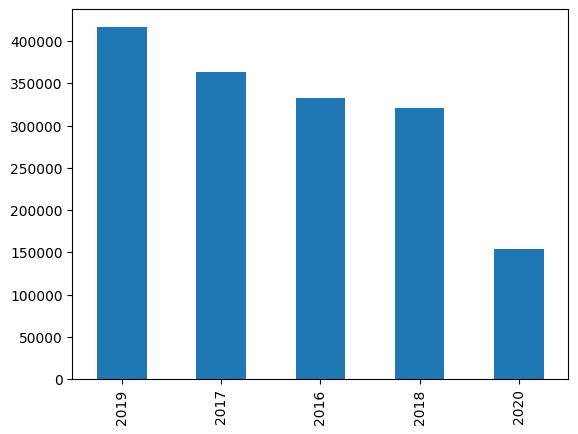

In [ ]:
#plot the articles per year
newspaper_df['year'].value_counts().plot(kind='bar')

<AxesSubplot: xlabel='year'>

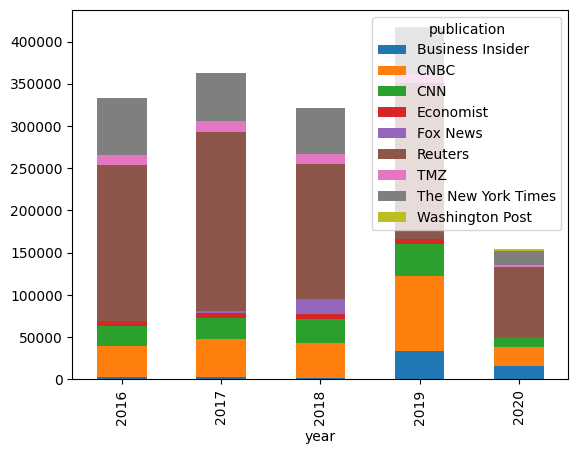

In [ ]:
#plot the articles per year per publication
newspaper_df.groupby(['year', 'publication']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot: xlabel='year'>

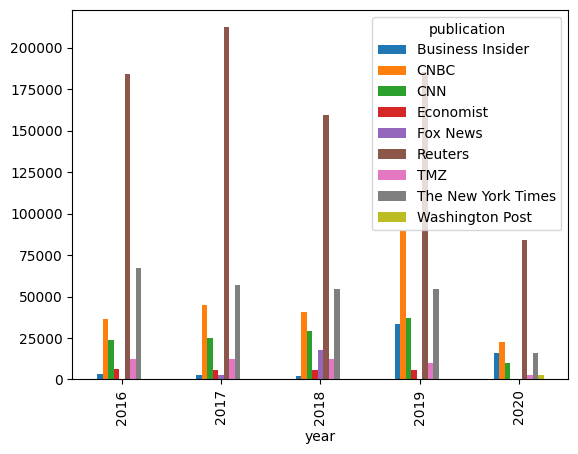

In [ ]:
#plot the articles per year per publication
newspaper_df.groupby(['year', 'publication']).size().unstack().plot(kind='bar', stacked=False)

## 2.3 Saving shorter df as csv

In [ ]:
import time
import math

In [ ]:
def split_dataframe(df, max_file_size_mb, file_name):
   
    start_time = time.time()

    max_file_size_bytes = max_file_size_mb * 1024 * 1024

    # Calculate the approximate size of each row in bytes
    row_size = df.memory_usage(deep=True).sum() / len(df)

    # Calculate the number of rows that would fit within the maximum file size
    num_rows_per_file = math.floor(max_file_size_bytes / row_size)

    # Split the DataFrame into sub DataFrames
    num_files = math.ceil(len(df) / num_rows_per_file)
    print(f'num_files: {num_files}')

    # Save each sub DataFrame as a CSV file with the specified name and a number
    for i in range(num_files):
        start_index = i * num_rows_per_file
        end_index = min((i + 1) * num_rows_per_file, len(df))
        sub_df = df.iloc[start_index:end_index].copy()
        file_path = f'{file_name}_{i + 1}.csv'
        sub_df.to_csv(file_path, index=False)

    # Stop the timer
    end_time = time.time()
    print(f'Finished splitting {len(df)} rows into {num_files} files in {end_time - start_time:.2f} seconds')

# 3 Starting point

## 3.1 Reading in

In [2]:
#list with the names of the files
file_names = ['newsdata_1.csv', 'newsdata_2.csv', 'newsdata_3.csv', 'newsdata_4.csv', 'newsdata_5.csv', 'newsdata_6.csv', 'newsdata_7.csv', 'newsdata_8.csv', 'newsdata_9.csv', 'newsdata_10.csv', 'newsdata_11.csv', 'newsdata_12.csv', 'newsdata_13.csv', 'newsdata_14.csv', 'newsdata_15.csv', 'newsdata_16.csv', 'newsdata_17.csv', 'newsdata_18.csv', 'newsdata_19.csv', 'newsdata_20.csv', 'newsdata_21.csv', 'newsdata_22.csv', 'newsdata_23.csv', 'newsdata_24.csv', 'newsdata_25.csv', 'newsdata_26.csv', 'newsdata_27.csv', 'newsdata_28.csv', 'newsdata_29.csv', 'newsdata_30.csv', 'newsdata_31.csv', 'newsdata_32.csv', 'newsdata_33.csv', 'newsdata_34.csv', 'newsdata_35.csv', 'newsdata_36.csv', 'newsdata_37.csv', 'newsdata_38.csv', 'newsdata_39.csv', 'newsdata_40.csv', 'newsdata_41.csv', 'newsdata_42.csv', 'newsdata_43.csv', 'newsdata_44.csv', 'newsdata_45.csv', 'newsdata_46.csv', 'newsdata_47.csv', 'newsdata_48.csv', 'newsdata_49.csv', 'newsdata_50.csv', 'newsdata_51.csv', 'newsdata_52.csv', 'newsdata_53.csv', 'newsdata_54.csv', 'newsdata_55.csv', 'newsdata_56.csv', 'newsdata_57.csv', 'newsdata_58.csv', 'newsdata_59.csv', 'newsdata_60.csv', 'newsdata_61.csv', 'newsdata_62.csv', 'newsdata_63.csv', 'newsdata_64.csv', 'newsdata_65.csv', 'newsdata_66.csv', 'newsdata_67.csv', 'newsdata_68.csv', 'newsdata_69.csv', 'newsdata_70.csv', 'newsdata_71.csv',
'newsdata_72.csv', 'newsdata_73.csv', 'newsdata_74.csv', 'newsdata_75.csv', 'newsdata_76.csv', 'newsdata_77.csv', 'newsdata_78.csv', 'newsdata_79.csv', 'newsdata_80.csv', 'newsdata_81.csv', 'newsdata_82.csv', 'newsdata_83.csv', 'newsdata_84.csv', 'newsdata_85.csv', 'newsdata_86.csv', 'newsdata_87.csv', 'newsdata_88.csv', 'newsdata_89.csv', 'newsdata_90.csv', 'newsdata_91.csv', 'newsdata_92.csv', 'newsdata_93.csv', 'newsdata_94.csv', 'newsdata_95.csv', 'newsdata_96.csv', 'newsdata_97.csv', 'newsdata_98.csv', 'newsdata_99.csv', 'newsdata_100.csv', 'newsdata_101.csv', 'newsdata_102.csv', 'newsdata_103.csv', 'newsdata_104.csv', 'newsdata_105.csv', 'newsdata_106.csv', 'newsdata_107.csv', 'newsdata_108.csv', 'newsdata_109.csv', 'newsdata_110.csv', 'newsdata_111.csv', 'newsdata_112.csv', 'newsdata_113.csv', 'newsdata_114.csv', 'newsdata_115.csv', 'newsdata_116.csv', 'newsdata_117.csv', 'newsdata_118.csv', 'newsdata_119.csv', 'newsdata_120.csv', 'newsdata_121.csv', 'newsdata_122.csv', 'newsdata_123.csv', 'newsdata_124.csv', 'newsdata_125.csv', 'newsdata_126.csv', 'newsdata_127.csv', 'newsdata_128.csv', 'newsdata_129.csv', 'newsdata_130.csv', 'newsdata_131.csv', 'newsdata_132.csv', 'newsdata_133.csv', 'newsdata_134.csv', 'newsdata_135.csv', 'newsdata_136.csv', 'newsdata_137.csv', 'newsdata_138.csv', 'newsdata_139.csv', 'newsdata_140.csv', 'newsdata_141.csv', 'newsdata_142.csv',
'newsdata_143.csv', 'newsdata_144.csv', 'newsdata_145.csv', 'newsdata_146.csv', 'newsdata_147.csv', 'newsdata_148.csv', 'newsdata_149.csv', 'newsdata_150.csv', 'newsdata_151.csv', 'newsdata_152.csv', 'newsdata_153.csv', 'newsdata_154.csv', 'newsdata_155.csv', 'newsdata_156.csv', 'newsdata_157.csv', 'newsdata_158.csv', 'newsdata_159.csv', 'newsdata_160.csv', 'newsdata_161.csv', 'newsdata_162.csv', 'newsdata_163.csv', 'newsdata_164.csv', 'newsdata_165.csv', 'newsdata_166.csv', 'newsdata_167.csv', 'newsdata_168.csv', 'newsdata_169.csv', 'newsdata_170.csv', 'newsdata_171.csv', 'newsdata_172.csv', 'newsdata_173.csv', 'newsdata_174.csv', 'newsdata_175.csv', 'newsdata_176.csv', 'newsdata_177.csv', 'newsdata_178.csv', 'newsdata_179.csv', 'newsdata_180.csv', 'newsdata_181.csv', 'newsdata_182.csv', 'newsdata_183.csv', 'newsdata_184.csv', 'newsdata_185.csv', 'newsdata_186.csv', 'newsdata_187.csv', 'newsdata_188.csv', 'newsdata_189.csv', 'newsdata_190.csv', 'newsdata_191.csv', 'newsdata_192.csv', 'newsdata_193.csv', 'newsdata_194.csv', 'newsdata_195.csv', 'newsdata_196.csv', 'newsdata_197.csv', 'newsdata_198.csv', 'newsdata_199.csv', 'newsdata_200.csv', 'newsdata_201.csv', 'newsdata_202.csv', 'newsdata_203.csv', 'newsdata_204.csv', 'newsdata_205.csv', 'newsdata_206.csv', 'newsdata_207.csv', 'newsdata_208.csv', 'newsdata_209.csv', 'newsdata_210.csv', 'newsdata_211.csv', 'newsdata_212.csv', 'newsdata_213.csv',
'newsdata_214.csv', 'newsdata_215.csv', 'newsdata_216.csv', 'newsdata_217.csv', 'newsdata_218.csv', 'newsdata_219.csv', 'newsdata_220.csv', 'newsdata_221.csv', 'newsdata_222.csv', 'newsdata_223.csv', 'newsdata_224.csv', 'newsdata_225.csv', 'newsdata_226.csv', 'newsdata_227.csv', 'newsdata_228.csv', 'newsdata_229.csv', 'newsdata_230.csv', 'newsdata_231.csv', 'newsdata_232.csv', 'newsdata_233.csv', 'newsdata_234.csv', 'newsdata_235.csv', 'newsdata_236.csv', 'newsdata_237.csv', 'newsdata_238.csv', 'newsdata_239.csv','newsdata_241.csv', 'newsdata_242.csv', 'newsdata_243.csv', 'newsdata_244.csv', 'newsdata_245.csv', 'newsdata_246.csv', 'newsdata_247.csv', 'newsdata_248.csv', 'newsdata_249.csv', 'newsdata_251.csv', 'newsdata_252.csv', 'newsdata_253.csv', 'newsdata_254.csv', 'newsdata_255.csv', 'newsdata_256.csv', 'newsdata_257.csv', 'newsdata_258.csv', 'newsdata_259.csv', 'newsdata_260.csv', 'newsdata_261.csv', 'newsdata_262.csv', 'newsdata_263.csv', 'newsdata_264.csv', 'newsdata_265.csv', 'newsdata_266.csv', 'newsdata_267.csv', 'newsdata_268.csv', 'newsdata_269.csv', 'newsdata_270.csv', 'newsdata_271.csv', 'newsdata_272.csv', 'newsdata_273.csv', 'newsdata_274.csv', 'newsdata_275.csv', 'newsdata_276.csv', 'newsdata_277.csv', 'newsdata_278.csv', 'newsdata_279.csv', 'newsdata_280.csv', 'newsdata_281.csv', 'newsdata_282.csv', 'newsdata_283.csv', 'newsdata_284.csv',
'newsdata_285.csv', 'newsdata_286.csv', 'newsdata_287.csv', 'newsdata_288.csv', 'newsdata_289.csv', 'newsdata_290.csv', 'newsdata_291.csv', 'newsdata_292.csv', 'newsdata_293.csv', 'newsdata_294.csv', 'newsdata_295.csv', 'newsdata_296.csv', 'newsdata_297.csv', 'newsdata_298.csv', 'newsdata_299.csv', 'newsdata_300.csv', 'newsdata_301.csv', 'newsdata_302.csv', 'newsdata_303.csv', 'newsdata_304.csv', 'newsdata_305.csv', 'newsdata_306.csv', 'newsdata_307.csv', 'newsdata_308.csv', 'newsdata_309.csv', 'newsdata_310.csv', 'newsdata_311.csv', 'newsdata_312.csv', 'newsdata_313.csv', 'newsdata_314.csv', 'newsdata_315.csv', 'newsdata_316.csv', 'newsdata_317.csv', 'newsdata_318.csv', 'newsdata_319.csv', 'newsdata_320.csv', 'newsdata_321.csv', 'newsdata_322.csv', 'newsdata_323.csv', 'newsdata_324.csv', 'newsdata_325.csv', 'newsdata_326.csv', 'newsdata_327.csv', 'newsdata_328.csv', 'newsdata_329.csv', 'newsdata_329.csv', 'newsdata_330.csv', 'newsdata_331.csv', 'newsdata_332.csv', 'newsdata_333.csv', 'newsdata_334.csv', 'newsdata_335.csv', 'newsdata_336.csv', 'newsdata_337.csv', 'newsdata_338.csv', 'newsdata_339.csv', 'newsdata_340.csv', 'newsdata_341.csv', 'newsdata_342.csv', 'newsdata_343.csv', 'newsdata_344.csv', 'newsdata_345.csv', 'newsdata_346.csv', 'newsdata_347.csv', 'newsdata_348.csv', 'newsdata_349.csv', 'newsdata_350.csv', 'newsdata_351.csv', 'newsdata_352.csv', 'newsdata_353.csv', 'newsdata_354.csv',
'newsdata_355.csv', 'newsdata_356.csv', 'newsdata_357.csv', 'newsdata_358.csv', 'newsdata_359.csv', 'newsdata_360.csv', 'newsdata_361.csv', 'newsdata_362.csv', 'newsdata_363.csv', 'newsdata_364.csv', 'newsdata_365.csv', 'newsdata_366.csv', 'newsdata_367.csv', 'newsdata_368.csv', 'newsdata_369.csv', 'newsdata_370.csv', 'newsdata_371.csv', 'newsdata_372.csv', 'newsdata_373.csv', 'newsdata_374.csv', 'newsdata_375.csv', 'newsdata_376.csv', 'newsdata_377.csv', 'newsdata_378.csv', 'newsdata_379.csv', 'newsdata_380.csv', 'newsdata_381.csv', 'newsdata_383.csv', 'newsdata_384.csv', 'newsdata_385.csv', 'newsdata_386.csv', 'newsdata_387.csv', 'newsdata_388.csv']

In [3]:
folder_path = "files"

#empty list to store individual dataframes
dfs = []


for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    
    # Read each file as a dataframe
    df = pd.read_csv(file_path)  
    
    dfs.append(df)


newsdata_df = pd.concat(dfs, ignore_index=True)

print(newsdata_df)

         year                                              title   
0        2016  Colts GM Ryan Grigson says Andrew Luck's contr...  \
1        2018       Trump denies report he ordered Mueller fired   
2        2019  France's Sarkozy reveals his 'Passions' but in...   
3        2016  Paris Hilton: Woman In Black For Uncle Monty's...   
4        2019  ECB's Coeure: If we decide to cut rates, we'd ...   
...       ...                                                ...   
1597455  2019  Merkel ally under police protection after 'Hei...   
1597456  2019  Ugandan shilling weakens on uptick in dollar a...   
1597457  2019  China's factory prices post steepest fall in t...   
1597458  2019  ECB's Draghi warns of bubble risk in the euro ...   
1597459  2019  Russia's Yandex releases rival to China's TikT...   

                                                   article       publication  
0         The Indianapolis Colts made Andrew Luck the h...  Business Insider  
1        DAVOS, Switzerla

In [4]:
newsdata_df.shape

(1597460, 4)

In [5]:
newsdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597460 entries, 0 to 1597459
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   year         1597460 non-null  int64 
 1   title        1597460 non-null  object
 2   article      1597460 non-null  object
 3   publication  1597460 non-null  object
dtypes: int64(1), object(3)
memory usage: 48.8+ MB


In [6]:
newsdata_df.head()

,year,title,article,publication
0,2016,Colts GM Ryan Grigson says Andrew Luck's contr...,The Indianapolis Colts made Andrew Luck the h...,Business Insider
1,2018,Trump denies report he ordered Mueller fired,"DAVOS, Switzerland (Reuters) - U.S. President ...",Reuters
2,2019,France's Sarkozy reveals his 'Passions' but in...,PARIS (Reuters) - Former French president Nico...,Reuters
3,2016,Paris Hilton: Woman In Black For Uncle Monty's...,Paris Hilton arrived at LAX Wednesday dressed ...,TMZ
4,2019,"ECB's Coeure: If we decide to cut rates, we'd ...","BERLIN, June 17 (Reuters) - ECB board member B...",Reuters


In [7]:
print(df['publication'].value_counts())
print(df['publication'].value_counts().sum())

publication
Reuters               410
The New York Times    178
Name: count, dtype: int64
588


In [8]:
#renew the index
newsdata_df = newsdata_df.reset_index(drop=True)

In [9]:
newsdata_df.tail()

,year,title,article,publication
1597455,2019,Merkel ally under police protection after 'Hei...,BERLIN (Reuters) - German police said on Monda...,Reuters
1597456,2019,Ugandan shilling weakens on uptick in dollar a...,"KAMPALA, Oct 14 (Reuters) - The Ugandan shilli...",Reuters
1597457,2019,China's factory prices post steepest fall in t...,BEIJING (Reuters) - China’s factory gate price...,Reuters
1597458,2019,ECB's Draghi warns of bubble risk in the euro ...,WASHINGTON (Reuters) - There are “mild signs” ...,Reuters
1597459,2019,Russia's Yandex releases rival to China's TikT...,MOSCOW (Reuters) - Russian internet firm Yande...,Reuters


## 3.1.b - for working on local machine

In [225]:
#create a file that includes only 1000 random from the newsdata_df
newslimited = newsdata_df.sample(n=1000, random_state=100)
print(newslimited.shape)

(1000, 4)


In [226]:
newslimited.head()

,year,title,article,publication
1462774,2020,8 DIY salon treatments that cost a lot less th...,"When you buy through our links, we may earn mo...",Business Insider
73651,2019,Judge to bat leadoff in his return to Yankees,The New York Yankees will waste little time in...,Reuters
843909,2018,Insurers' new business: 'active shooter' polic...,(Reuters) - Insurance broker Paul Marshall can...,Reuters
707086,2018,"In China, industry push-back stubs out anti-sm...","BEIJING (Reuters) - Earlier this year, the cit...",Reuters
651829,2019,FOREX-Dollar on back foot as focus shifts to F...,* Graphic: World FX rates in 2019 tmsnrt.rs/2e...,Reuters


In [227]:
print(newslimited['publication'].value_counts())

publication
Reuters               519
The New York Times    169
CNBC                  158
CNN                    75
Business Insider       30
TMZ                    25
Fox News               16
Economist               8
Name: count, dtype: int64


In [265]:
newslimited_cleaned = newslimited.copy()

## 3.2 Cleaning

In [10]:
# Function for Cleaning text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#all possible pulishers in list
publishers = ['Atlantic', 'Breitbart', 'Business Insider', 'Buzzfeed News', 'CNN', 'Fox News', 'Guardian', 'NPR', 'National Review', 'New York Post', 'New York Times', 'Reuters', 'Talking Points Memo', 'Vox', 'Washington Post']

import string


def clean(text):
    # Remove words in the publishers list
    for publisher in publishers:
        text = text.replace(publisher, '')

    # Convert to lowercase
    text = text.lower()

    # Remove mentions
    text = re.sub(r'@[^\s]+', '', text)

    # Remove numbers in the format 1,2,3 (not written in letters)
    text = re.sub(r'\b\d+\b', '', text)

    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove non-alphanumeric characters and extra whitespace
    text = re.sub(r'http\S+|www\S+|email\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s.]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\.(?!\w)', '', text)

    # Replace "?" and "!" with "."
    #text = text.replace('?', '.').replace('!', '.')

    # Tokenize the article into words
    tokens = word_tokenize(text)

    # Remove stopwords
    stopwords = set(stop_words)
    tokens = [word for word in tokens if word not in stopwords]

    # Lemmatize tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a cleaned article
    cleaned_text = ' '.join(tokens)

    return cleaned_text




In [11]:
newslimited_cleaned = newsdata_df.copy()

In [12]:
# Cleaning the text
newslimited_cleaned['article'] = newslimited_cleaned['article'].apply(clean)

In [13]:
newslimited_cleaned.head()

,year,title,article,publication
0,2016,Colts GM Ryan Grigson says Andrew Luck's contr...,indianapolis colt made andrew luck highestpaid...,Business Insider
1,2018,Trump denies report he ordered Mueller fired,davos switzerland u.s president donald trump d...,Reuters
2,2019,France's Sarkozy reveals his 'Passions' but in...,paris former french president nicolas sarkozy ...,Reuters
3,2016,Paris Hilton: Woman In Black For Uncle Monty's...,paris hilton arrived lax wednesday dressed pay...,TMZ
4,2019,"ECB's Coeure: If we decide to cut rates, we'd ...",berlin june ecb board member benoit coeure sai...,Reuters


In [14]:
newslimited_cleaned.iloc[0]['article']

'indianapolis colt made andrew luck highestpaid player nfl history offseason fiveyear million contract million guaranteed however theyre already finding luck contract inhibiting ability address weakness part roster particularly defense friday colt gm ryan grigson fire colt start said difficult build team defense luck making much money according keefer grigson point colt still young talent theyre hoping develop defense however blaming luck contract colt gave weak defense 30th defensive dvoa accurate others pointed last year denver bronco paid peyton manning million base salary also boasting elite defense luck also take million salary cap year le million manning year ago million much come drafting successfully colt done well elite team like bronco patriot instance colt handcuffed luck contract drafting going become especially important use whatever money free agency certainly possible build good defense highpaid quarterback colt felt paying luck high sum money would difficult perhaps rec

In [15]:
print(newsdata_df.iloc[0]['article'])

 The Indianapolis Colts made Andrew Luck the highest-paid player in NFL history this offseason with a five-year, $122-million contract with $89 million guaranteed. However, they're already finding that Luck's contract is inhibiting their ability to address weaknesses on other parts of the roster, particularly on defense. On Friday, Colts GM Ryan Grigson, who is under fire for the Colts 1-3 start, said that it's difficult to build up the team's defense with Luck making so much money. According to Keefer, Grigson did point out that the Colts still have young talent they're hoping to develop on defense. However, blaming Luck's contract — which the Colts gave him — for having a weak defense (30th in defensive DVOA) is not accurate. As others have pointed out, last year's Denver Broncos paid Peyton Manning $15 million in base salary while also boasting an elite defense. Luck also takes up $18.4 million against the salary cap this year, less than $1 million more than Manning did a year ago (

In [16]:
#reset index for newslimited_cleaned
newslimited_cleaned = newslimited_cleaned.reset_index(drop=True)
newslimited_cleaned.head()

,year,title,article,publication
0,2016,Colts GM Ryan Grigson says Andrew Luck's contr...,indianapolis colt made andrew luck highestpaid...,Business Insider
1,2018,Trump denies report he ordered Mueller fired,davos switzerland u.s president donald trump d...,Reuters
2,2019,France's Sarkozy reveals his 'Passions' but in...,paris former french president nicolas sarkozy ...,Reuters
3,2016,Paris Hilton: Woman In Black For Uncle Monty's...,paris hilton arrived lax wednesday dressed pay...,TMZ
4,2019,"ECB's Coeure: If we decide to cut rates, we'd ...",berlin june ecb board member benoit coeure sai...,Reuters


In [17]:
#safe newslimited_cleaned as csv
newslimited_cleaned.to_csv('newslimited_cleaned.csv', index=False)

# 4 Topic modelling

## 4.1 Copy articles

In [19]:
articles = newslimited_cleaned['article']
articles[:10]

0    indianapolis colt made andrew luck highestpaid...
1    davos switzerland u.s president donald trump d...
2    paris former french president nicolas sarkozy ...
3    paris hilton arrived lax wednesday dressed pay...
4    berlin june ecb board member benoit coeure sai...
5    caracas venezuelan authority arrested six memb...
6    success hudson bay co executive chairman richa...
7    joakim noah model girlfriend lais ribeiro damn...
8    jermaine jackson slamming quincy jones removin...
9    london british prime minister theresa may pres...
Name: article, dtype: object

In [20]:
#count how often energy is in preprocessed_docs
count = 0
for doc in articles:
    if 'energy' in doc:
        count += 1
print(count)

113231


## 4.2 Bag of Words

In [21]:
# Tokenize the articles
articles = articles.apply(word_tokenize)
print(articles[:10])

0    [indianapolis, colt, made, andrew, luck, highe...
1    [davos, switzerland, u.s, president, donald, t...
2    [paris, former, french, president, nicolas, sa...
3    [paris, hilton, arrived, lax, wednesday, dress...
4    [berlin, june, ecb, board, member, benoit, coe...
5    [caracas, venezuelan, authority, arrested, six...
6    [success, hudson, bay, co, executive, chairman...
7    [joakim, noah, model, girlfriend, lais, ribeir...
8    [jermaine, jackson, slamming, quincy, jones, r...
9    [london, british, prime, minister, theresa, ma...
Name: article, dtype: object


Specific cleaning for LDA

In [22]:
def clean_lda(tokens):
    # Remove stopwords
    own_stopwords = ["would", "could", "get", "always", "dont", "may", "said", "Mr.", "ha", "wa", "time", "year", "day", "week", "month", "like", "say", "also", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "new", "mr", "last", "even", "monday", "tuesday", "wednesday", "thursday", "friday", "saturday", "sunday", "u", "first", "second", "third", "fourth", "fifth", "sixth", "seventh", "eighth", "ninth", "tenth"]
    tokens = [word for word in tokens if word not in own_stopwords]

    return tokens

In [23]:
articles = articles.apply(clean_lda)

In [24]:
#safe newslimited_cleaned as csv
articles.to_csv('articles.csv', index=False)

In [25]:
#show the first article in articles
print(articles[0])


['indianapolis', 'colt', 'made', 'andrew', 'luck', 'highestpaid', 'player', 'nfl', 'history', 'offseason', 'fiveyear', 'million', 'contract', 'million', 'guaranteed', 'however', 'theyre', 'already', 'finding', 'luck', 'contract', 'inhibiting', 'ability', 'address', 'weakness', 'part', 'roster', 'particularly', 'defense', 'colt', 'gm', 'ryan', 'grigson', 'fire', 'colt', 'start', 'difficult', 'build', 'team', 'defense', 'luck', 'making', 'much', 'money', 'according', 'keefer', 'grigson', 'point', 'colt', 'still', 'young', 'talent', 'theyre', 'hoping', 'develop', 'defense', 'however', 'blaming', 'luck', 'contract', 'colt', 'gave', 'weak', 'defense', '30th', 'defensive', 'dvoa', 'accurate', 'others', 'pointed', 'denver', 'bronco', 'paid', 'peyton', 'manning', 'million', 'base', 'salary', 'boasting', 'elite', 'defense', 'luck', 'take', 'million', 'salary', 'cap', 'le', 'million', 'manning', 'ago', 'million', 'much', 'come', 'drafting', 'successfully', 'colt', 'done', 'well', 'elite', 'team'

In [26]:
dictionary = gensim.corpora.Dictionary(articles)

In [27]:
print(len(dictionary.iteritems()))

2008848


In [28]:
#show the last elements of the dictionary
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 30th
1 ability
2 according
3 accurate
4 address
5 agency
6 ago
7 already
8 andrew
9 base
10 become


In [30]:
#create each a dictionary for each article
bow_corpus = [dictionary.doc2bow(doc) for doc in articles]
print(f' Number of articles: {len(bow_corpus)}')
print(f'Number of different words in first article: {len(bow_corpus[0])}')

 Number of articles: 1597460
Number of different words in first article: 96


In [31]:
print(bow_corpus[0])


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 2), (15, 1), (16, 1), (17, 8), (18, 1), (19, 4), (20, 6), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 2), (27, 1), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 2), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 7), (56, 1), (57, 1), (58, 2), (59, 6), (60, 3), (61, 2), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 3), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1)]


## 4.3 TF-IDF

In [32]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

for doc in corpus_tfidf:
    pprint(doc)
    break

## 4.4 Running LDA using BoW

In [33]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, 
                                       id2word=dictionary, passes=2, 
                                       workers=2)

In [34]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.007*"city" + 0.007*"art" + 0.006*"m" + 0.005*"york" + 0.005*"food" + 0.005*"home" + 0.004*"street" + 0.004*"house" + 0.004*"museum" + 0.004*"restaurant"
Topic: 1 
Words: 0.011*"state" + 0.009*"coronavirus" + 0.009*"country" + 0.009*"united" + 0.008*"china" + 0.007*"official" + 0.007*"government" + 0.007*"people" + 0.006*"military" + 0.005*"war"
Topic: 2 
Words: 0.017*"market" + 0.013*"rate" + 0.010*"economy" + 0.009*"bank" + 0.009*"u.s" + 0.009*"stock" + 0.008*"price" + 0.008*"trade" + 0.008*"economic" + 0.008*"growth"
Topic: 3 
Words: 0.013*"de" + 0.009*"la" + 0.008*"game" + 0.006*"team" + 0.006*"season" + 0.005*"que" + 0.005*"en" + 0.005*"el" + 0.005*"los" + 0.005*"play"
Topic: 4 
Words: 0.031*"trump" + 0.019*"president" + 0.010*"state" + 0.008*"house" + 0.008*"republican" + 0.007*"democrat" + 0.007*"campaign" + 0.006*"american" + 0.006*"white" + 0.006*"democratic"
Topic: 5 
Words: 0.008*"m" + 0.007*"court" + 0.006*"case" + 0.006*"state" + 0.006*"law" + 0.005*"woma

## 4.5 Visualization

In [35]:
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim_models
import gensim

vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

In [36]:
#print the 10 most important terms for each topic
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    

Topic: 0 
Words: 0.007*"city" + 0.007*"art" + 0.006*"m" + 0.005*"york" + 0.005*"food" + 0.005*"home" + 0.004*"street" + 0.004*"house" + 0.004*"museum" + 0.004*"restaurant"
Topic: 1 
Words: 0.011*"state" + 0.009*"coronavirus" + 0.009*"country" + 0.009*"united" + 0.008*"china" + 0.007*"official" + 0.007*"government" + 0.007*"people" + 0.006*"military" + 0.005*"war"
Topic: 2 
Words: 0.017*"market" + 0.013*"rate" + 0.010*"economy" + 0.009*"bank" + 0.009*"u.s" + 0.009*"stock" + 0.008*"price" + 0.008*"trade" + 0.008*"economic" + 0.008*"growth"
Topic: 3 
Words: 0.013*"de" + 0.009*"la" + 0.008*"game" + 0.006*"team" + 0.006*"season" + 0.005*"que" + 0.005*"en" + 0.005*"el" + 0.005*"los" + 0.005*"play"
Topic: 4 
Words: 0.031*"trump" + 0.019*"president" + 0.010*"state" + 0.008*"house" + 0.008*"republican" + 0.007*"democrat" + 0.007*"campaign" + 0.006*"american" + 0.006*"white" + 0.006*"democratic"
Topic: 5 
Words: 0.008*"m" + 0.007*"court" + 0.006*"case" + 0.006*"state" + 0.006*"law" + 0.005*"woma

In [ ]:
#add to each article in newslimited_cleaned the topic number in a new column
newslimited_cleaned['topic'] = newslimited_cleaned['article'].apply(lambda x: lda_model[dictionary.doc2bow(x.split())][0][0])
newslimited_cleaned.head()

## 4.6 Cutting & encoding

In [38]:
newslimited_cleaned['topic'].unique()

array([3, 4, 2, 1, 0, 7, 5, 6, 9, 8])

In [41]:
#safe newslimited_cleaned as csv
newslimited_cleaned.to_csv('categorized.csv', index=False)

In [7]:
newspaper_cleaned = pd.read_csv('categorized.csv')

In [8]:
newspaper_cleaned.head()

,year,title,article,publication,topic
0,2016,Colts GM Ryan Grigson says Andrew Luck's contr...,indianapolis colt made andrew luck highestpaid...,Business Insider,3
1,2018,Trump denies report he ordered Mueller fired,davos switzerland u.s president donald trump d...,Reuters,4
2,2019,France's Sarkozy reveals his 'Passions' but in...,paris former french president nicolas sarkozy ...,Reuters,3
3,2016,Paris Hilton: Woman In Black For Uncle Monty's...,paris hilton arrived lax wednesday dressed pay...,TMZ,3
4,2019,"ECB's Coeure: If we decide to cut rates, we'd ...",berlin june ecb board member benoit coeure sai...,Reuters,2


In [9]:
newspaper_cleaned['topic'].unique()

array([3, 4, 2, 1, 0, 7, 5, 6, 9, 8])

In [5]:
newslimited_cat = newspaper_cleaned.copy()

In [8]:
newslimited_cat['topic'] = newslimited_cat['topic'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [20, 17, 15, 16, 14, 12, 18, 19, 13, 11])

In [9]:
newslimited_cat['topic'] = newslimited_cat['topic'].replace([11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [10]:
newslimited_cat.head()

,year,title,article,publication,topic
0,2016,Colts GM Ryan Grigson says Andrew Luck's contr...,indianapolis colt made andrew luck highestpaid...,Business Insider,6
1,2018,Trump denies report he ordered Mueller fired,davos switzerland u.s president donald trump d...,Reuters,4
2,2019,France's Sarkozy reveals his 'Passions' but in...,paris former french president nicolas sarkozy ...,Reuters,6
3,2016,Paris Hilton: Woman In Black For Uncle Monty's...,paris hilton arrived lax wednesday dressed pay...,TMZ,6
4,2019,"ECB's Coeure: If we decide to cut rates, we'd ...",berlin june ecb board member benoit coeure sai...,Reuters,5


In [11]:
newslimited_cat['topic'].unique()

array([ 6,  4,  5,  7, 10,  9,  2,  8,  1,  3])

<Axes: xlabel='publication'>

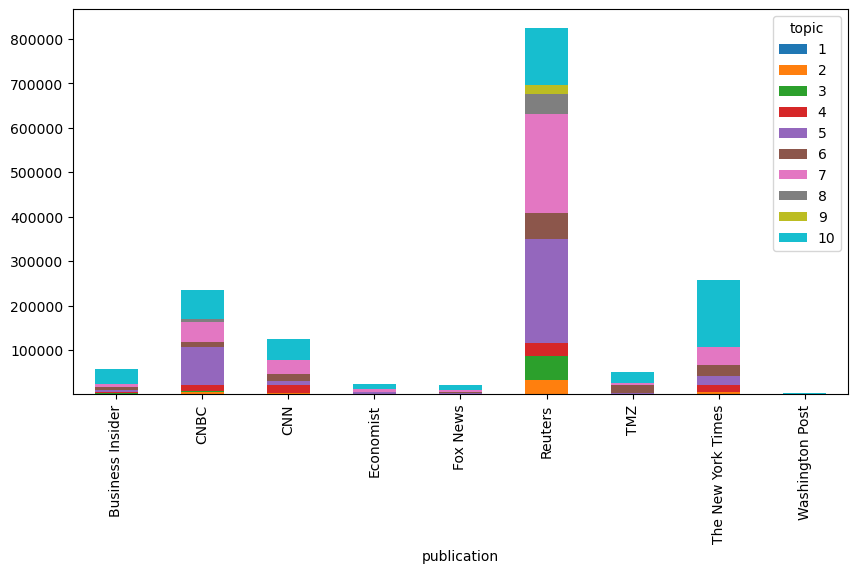

In [12]:
#distribution over articles per publication for each topic
newslimited_cat.groupby(['publication', 'topic']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,5))

In [13]:
#distribution over articles per publication for topics 2,4,7, 9
newslimited_cat[newslimited_cat['topic'].isin([2,4,7,9])]['publication'].value_counts()

publication
Reuters               305190
CNBC                   66958
The New York Times     62265
CNN                    52507
Business Insider       10733
Economist               7236
Fox News                6214
TMZ                     3409
Washington Post          815
Name: count, dtype: int64

<Axes: xlabel='publication'>

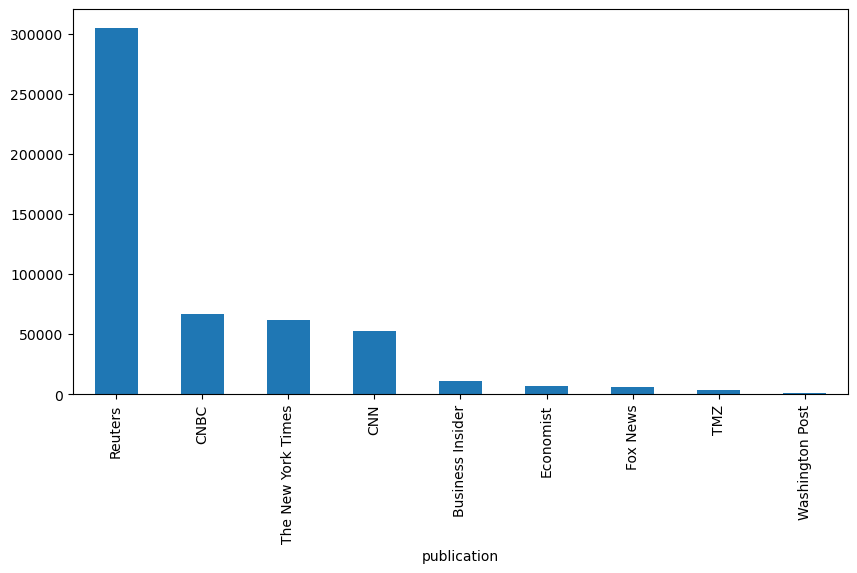

In [14]:
#plot results of previous step 
newslimited_cat[newslimited_cat['topic'].isin([2,4,7,9])]['publication'].value_counts().plot(kind='bar', figsize=(10,5))

In [15]:
#reduce newslimited_cat to topics 2,4,7,9
news_pol = newslimited_cat[newslimited_cat['topic'].isin([2,4,7,9])]

In [16]:
news_pol['topic'].unique()

array([4, 7, 9, 2])

In [17]:
#drop all rows where publication is in delete
delete = ['Reuters', 'TMZ', 'Washington Post']
news_pol = news_pol[~news_pol['publication'].isin(delete)]

In [18]:
news_pol['publication'].value_counts()

publication
CNBC                  66958
The New York Times    62265
CNN                   52507
Business Insider      10733
Economist              7236
Fox News               6214
Name: count, dtype: int64

In [19]:
news_pol['publication'] = news_pol['publication'].replace(['CNBC', 'The New York Times', 'CNN', 'Business Insider', 'Economist', 'Fox News'], [1, 2, 3, 4, 5, 6])

In [21]:
news_pol['publication'].unique()

array([4, 5, 3, 1, 6, 2])

In [22]:
#safe as csv
news_pol.to_csv('news_pol.csv', index=False)

# 5 Imbalance handling

In [23]:
#reduce news_pol to the columns article, topic and publication
news_pol = news_pol[['article', 'topic', 'publication']]

In [24]:
#list all publications in news_pol
news_pol['publication'].unique()

array([4, 5, 3, 1, 6, 2])

In [27]:
# split news_pol into train and test set, the test set should include 20% of each topic
train, test = train_test_split(news_pol, test_size=0.2, stratify=news_pol['topic'])

In [28]:
print(train.shape)
print(test.shape)

(164730, 3)
(41183, 3)


In [167]:
#split the train set into dataframe for each topic but only incorporate the columns publication and article
train_2 = train[train['topic'] == 2][['publication', 'article']]
train_4 = train[train['topic'] == 4][['publication', 'article']]
train_7 = train[train['topic'] == 7][['publication', 'article']]
train_9 = train[train['topic'] == 9][['publication', 'article']]

In [168]:
print(train_2.shape)
print(train_4.shape)
print(train_7.shape)
print(train_9.shape)

(12582, 2)
(40037, 2)
(110369, 2)
(1742, 2)


In [162]:
#publisher with the most articles for each train_2, train_4, train_7, train_9
print(train_2['publication'].value_counts())
print(train_4['publication'].value_counts())
print(train_7['publication'].value_counts())
print(train_9['publication'].value_counts())

publication
1    4715
2    3869
3    2361
4     947
6     425
5     265
Name: count, dtype: int64
publication
3    13751
2    12916
1    10198
4     1872
5      666
6      634
Name: count, dtype: int64
publication
1    37397
2    32765
3    25883
4     5663
5     4752
6     3909
Name: count, dtype: int64
publication
1    1283
2     171
4     133
5      93
3      47
6      15
Name: count, dtype: int64


In [169]:
#count of CNBC articles in each train set
mj_2 = train_2['publication'].value_counts()[1]
mj_4 = train_4['publication'].value_counts()[3]
mj_7 = train_7['publication'].value_counts()[1]
mj_9 = train_9['publication'].value_counts()[1]

In [164]:

#print all mj values
print(mj_2)
print(mj_4)
print(mj_7)
print(mj_9)

4715
13751
37397
1283


In [181]:
# Count of CNBC articles in each train set
mj_2 = train_2['publication'].value_counts()[1]
mj_4 = train_4['publication'].value_counts()[3]
mj_7 = train_7['publication'].value_counts()[1]
mj_9 = train_9['publication'].value_counts()[1]

number = [6]
dif = []

for i in number:
    dif_2 = mj_2 - train_2['publication'].value_counts()[i]
    print(dif_2)
    dif_4 = mj_4 - train_4['publication'].value_counts()[i]
    print(dif_4)
    dif_7 = mj_7 - train_7['publication'].value_counts()[i]
    print(dif_7)
    dif_9 = mj_9 - train_9['publication'].value_counts()[i]
    print(dif_9)

    dif.extend([dif_2, dif_4, dif_7, dif_9])



# Add to each topic dataframe as many random duplicates of the publication as respective dif value
for i in range(len(topic_dfs)):
    topic_dfs[i] = pd.concat([topic_dfs[i], topic_dfs[i][topic_dfs[i]['publication'] == 6].sample(dif[i], replace=True)])
    print(topic_dfs[i].shape)


4290
13117
33488
1268
(28290, 2)
(82506, 2)
(224382, 2)
(7698, 2)


In [182]:
#show distribution of publication in each topic dataframe
for i in range(len(topic_dfs)):
    print(topic_dfs[i]['publication'].value_counts())
    


publication
2    4715
1    4715
5    4715
3    4715
6    4715
4    4715
Name: count, dtype: int64
publication
1    13751
3    13751
2    13751
4    13751
5    13751
6    13751
Name: count, dtype: int64
publication
1    37397
3    37397
2    37397
4    37397
6    37397
5    37397
Name: count, dtype: int64
publication
1    1283
4    1283
2    1283
5    1283
3    1283
6    1283
Name: count, dtype: int64


In [186]:
#add to the first topic df a new column thta is called "topic" and has the value 2
topic_dfs[0]['topic'] = 2
topic_dfs[1]['topic'] = 4
topic_dfs[2]['topic'] = 7
topic_dfs[3]['topic'] = 9

In [187]:
#concatenate all topic dfs to one train df
train = pd.concat(topic_dfs)

In [188]:
train.head()

,publication,article,topic
1064359,2,fiat chrysler autombiles recalling jeep wrangl...,2
960758,1,ottawa march china provided scientific evidenc...,2
880653,1,cybersecurity company started two former natio...,2
1180764,2,washington federal aviation administration sai...,2
823514,1,san francisco last october angellist company h...,2


In [190]:
train['publication'].unique()


array([2, 1, 5, 3, 6, 4])

In [191]:
train['topic'].unique()

array([2, 4, 7, 9])

In [192]:
#distribution for train over publication
train['publication'].value_counts()

publication
2    57146
1    57146
5    57146
3    57146
6    57146
4    57146
Name: count, dtype: int64

In [193]:
#distribution for train over publication
train['topic'].value_counts()

topic
7    224382
4     82506
2     28290
9      7698
Name: count, dtype: int64

In [194]:
#safe news_pol as csv
train.to_csv('train.csv', index=False)

In [195]:
test.head()

,article,topic,publication
772802,intention presidentelect donald trump put end ...,7,1
839481,board member uber arianna huffington active tr...,2,1
1451099,live blog european stock type live eikon news ...,7,1
367561,peter bergen national security analyst vice pr...,7,3
1159423,m scott lutheran pastor one recent morning hap...,7,2


In [196]:
#safe news_pol as csv
test.to_csv('test.csv', index=False)

# 6 BERT Prep

## 6.1 Data prep

### 6.1.1 Reading in and cutting

In [3]:
#read in train csv
train = pd.read_csv('/Users/Felix/Library/CloudStorage/GoogleDrive-fel.xwlt@gmail.com/Meine Ablage/NLP_project/train.csv')

In [74]:
#test 
test = pd.read_csv('/Users/Felix/Library/CloudStorage/GoogleDrive-fel.xwlt@gmail.com/Meine Ablage/NLP_project/test.csv')

In [4]:
#get random sample of 200 rows from test
train = train.sample(10000)

In [5]:
#give me a random sample of 100 rows
train['publication'].value_counts()


publication
3    1691
1    1681
5    1674
2    1669
6    1662
4    1623
Name: count, dtype: int64

In [6]:
train.head()


,publication,article,topic
279876,5,editor note july 8th new york mets rookie pete...,7
178042,1,north korea behind cyberattack derailed britai...,7
327334,6,close video bret baier open three day january ...,7
201833,1,libya powerful military leader reportedly suff...,7
334977,6,next image prev image tokyo hiroshima marked a...,7


In [7]:
train['topic'].unique()


array([7, 9, 4, 2])

### 6.1.2 prepping

In [8]:
def get_split(text1):
  l_total = []
  if len(text1)//150 >0:
    n = len(text1)//150
  else: 
    n = 1
  for w in range(n):
    if w == 0:
      l_sub = []
      l_sub = text1[:200]
      l_total.append(l_sub)
    else:
      l_sub = []
      l_sub = text1[w*150:w*150 + 200]
      l_total.append(l_sub)
  return l_total


In [9]:
#tokenize the article column of train_sub
train['article'] = train['article'].apply(word_tokenize)
#test['article'] = test['article'].apply(word_tokenize)

In [10]:
train.head()

,publication,article,topic
279876,5,"[editor, note, july, 8th, new, york, mets, roo...",7
178042,1,"[north, korea, behind, cyberattack, derailed, ...",7
327334,6,"[close, video, bret, baier, open, three, day, ...",7
201833,1,"[libya, powerful, military, leader, reportedly...",7
334977,6,"[next, image, prev, image, tokyo, hiroshima, m...",7


In [11]:
#apply get_split to each article in train_sub
#test['text_split'] = test['article'].apply(get_split)
train['text_split'] = train['article'].apply(get_split)


In [13]:
#news_pol.head()

In [14]:
def create_new_rows(train_sub):
    BERT_df = pd.DataFrame(columns=['article_split', 'topic', 'publication'])
    row_list = []

    for i in range(len(train_sub)):
        for j in range(len(train_sub.iloc[i]['text_split'])):
            new_row = {
                'article_split': train_sub.iloc[i]['text_split'][j],
                'topic': train_sub.iloc[i]['topic'],
                'publication': train_sub.iloc[i]['publication'],
                #'year': train_sub.iloc[i]['year']
            }
            row_list.append(new_row)

    BERT_df = pd.concat([BERT_df, pd.DataFrame(row_list)], ignore_index=True)
    
    return BERT_df


In [15]:
train_df = create_new_rows(train)
#test_df = create_new_rows(test)


In [16]:
train_df[:10]

,article_split,topic,publication
0,"[editor, note, july, 8th, new, york, mets, roo...",7,5
1,"[north, korea, behind, cyberattack, derailed, ...",7,1
2,"[close, video, bret, baier, open, three, day, ...",7,6
3,"[libya, powerful, military, leader, reportedly...",7,1
4,"[support, egypt, united, arab, emirate, uae, e...",7,1
5,"[military, force, open, libya, central, export...",7,1
6,"[next, image, prev, image, tokyo, hiroshima, m...",7,6
7,"[secretary, homeland, security, kirstjen, niel...",7,5
8,"[department, spokesman, called, report, false,...",7,5
9,"[rome, italyaposs, star, movement, long, foref...",9,6


In [17]:
train_df.shape

(22506, 3)

In [18]:
#BERT_df.to_csv('BERT_df.csv', index=False)

In [19]:
train_df['article_split'].apply(lambda x: len(x)).max()

200

# 7. Word Embeddings

## 7.1 Bag of Words 

In [ ]:
# CountVectorizer 
BoW = CountVectorizer()
BoW.fit(train['article'])

CountVectorizer()

## 7.2 Word2Vect - Trained on our own data

Got codes from: 
https://spotintelligence.com/2023/02/15/word2vec-for-text-classification/

In [ ]:
# Tokenizing the cleaned text
train_text = train['article']
train_tokens = train_text.apply(word_tokenize)

test_text = test['article']
test_tokens = test_text.apply(word_tokenize)

In [ ]:
# Training the Word2Vec model 
wvT = Word2Vec(train_tokens, 
               vector_size = 100, 
               window = 5, 
               min_count = 2, 
               workers = 4)

In [ ]:
# Function for vectorizing the text
def vectorize(tokens):
    words = tokens.split()
    words_vecs = [wvT.wv[word] for word in words if word in wvT.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

## 7.3 Word2Vec - Trained by Google

Got codes from Exercise Class

In [ ]:
# Google trained one 
wvG = api.load('word2vec-google-news-300')

In [ ]:
# Function for computing the average vector 
# Gathered from Exercise 8

def avg_feature_vector(words, model, num_features):
    n_words = 0
    feature_vec = np.zeros((num_features, ), dtype='float32')
    for word in words:
        try:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
        except KeyError:
            pass
    if n_words == 0:
        return feature_vec
    else:
        return feature_vec / n_words


# 8. Text Classification 

In [ ]:
# Evaluation function that prints classification report and confusion matrix
def evaluate(y_test, y_pred, model_name):
    '''
    Function for Evaluating a model
    Prints out:
    --- Classification Report 
    --- Confusion Matrix
    '''
    
    print(f"\033[34m{model_name}\033[0m")
    
    #print Classification Report and Accuracy
    print(f" \033[32mClassification Report:\033[0m")
    print(classification_report(y_test, y_pred, zero_division=False))
    print(f" \033[32mAccuracy Score:\033[0m")
    print(accuracy_score(y_test, y_pred)*100)

## 8.1 Baseline Models

### 8.1.1 Logistic Regression with Bag of Words

In [ ]:
# Extracting features and content
y_test = test['publication']
y_train = train['publication']
X_test = test['article']
X_train = train['article']

In [ ]:
# Vectorizer 
X_train_bow = BoW.transform(X_train)
X_test_bow = BoW.transform(X_test)

# Classifier 
lr_bow = LogisticRegression(max_iter=1000000)
lr_bow.fit(X_train_bow, y_train)

# Evaluate
yPred_lr_bow = lr_bow.predict(X_test_bow)
evaluate(y_test, yPred_lr_bow, 'Logistic Regression with BoW')

Logistic Regression with BoW
 Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.77      0.79       335
           2       0.91      0.73      0.81       296
           3       0.76      0.68      0.72       254
           4       0.50      0.80      0.62        56
           5       0.71      1.00      0.83        39
           6       0.22      0.80      0.34        20

    accuracy                           0.75      1000
   macro avg       0.65      0.80      0.68      1000
weighted avg       0.80      0.75      0.76      1000

 Accuracy Score:
74.7


In [ ]:
confusion_matrix_bow = confusion_matrix(y_test, yPred_lr_bow)
classes_bow = np.unique(y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_bow, display_labels = classes_bow)
fig, ax = plt.subplots()
cm_display.plot(ax=ax)
ax.set_title('Confusion Matrix For Logistic Regression with BoW') 
plt.show()

### 8.1.2 Random Forest with Bag of Words

In [ ]:
# Classifier 
rf_bow = RandomForestClassifier()
rf_bow.fit(X_train_bow, y_train)

# Evaluate
yPred_rf_bow = rf_bow.predict(X_test_bow)
evaluate(y_test, yPred_rf_bow, 'Random Forest with BoW')

Random Forest with BoW
 Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.81      0.80       335
           2       0.84      0.70      0.76       296
           3       0.72      0.69      0.70       254
           4       0.79      0.80      0.80        56
           5       0.88      0.97      0.93        39
           6       0.23      0.80      0.35        20

    accuracy                           0.75      1000
   macro avg       0.71      0.80      0.72      1000
weighted avg       0.78      0.75      0.76      1000

 Accuracy Score:
75.1


#### 8.1.3 Logistic Regression with own trained Word2Vec embeddings

In [ ]:
# Vectorizing
X_train_wvT = np.array([vectorize(train_tokens) for train_tokens in X_train])
X_test_wvT = np.array([vectorize(train_tokens) for train_tokens in X_test])

In [ ]:
# Classifier 
lr_wvT = LogisticRegression(max_iter=1000000)
lr_wvT.fit(X_train_wvT, y_train)

# Evaluate
yPred_lr_wvT = lr_wvT.predict(X_test_wvT)
evaluate(y_test, yPred_lr_wvT, 'Logisitic Regression with own W2V')

Logisitic Regression with own W2V
 Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.67      0.74       335
           2       0.84      0.55      0.66       296
           3       0.59      0.60      0.60       254
           4       0.26      0.55      0.35        56
           5       0.47      0.97      0.64        39
           6       0.16      0.60      0.26        20

    accuracy                           0.62      1000
   macro avg       0.52      0.66      0.54      1000
weighted avg       0.71      0.62      0.65      1000

 Accuracy Score:
62.1


In [ ]:
confusion_matrix_wvt = confusion_matrix(y_test, yPred_lr_wvT)
classes_wvt = np.unique(y_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_wvt, display_labels = classes_wvt)
fig, ax = plt.subplots()
cm_display.plot(ax=ax)
ax.set_title('Confusion Matrix For Logistic Regression with own trained W2V') 
plt.show()

### 3.1.4 Random Forest with own trained Word2Vec embeddings

In [ ]:
# Classifier 
rf_wvT = RandomForestClassifier()
rf_wvT.fit(X_train_wvT, y_train)

# Evaluate
yPred_rf_wvT = rf_wvT.predict(X_test_wvT)
evaluate(y_test, yPred_rf_wvT, 'Random Forest with own W2V')

Random Forest with own W2V
 Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.67      0.74       335
           2       0.76      0.43      0.55       296
           3       0.63      0.66      0.64       254
           4       0.24      0.48      0.32        56
           5       0.36      0.90      0.51        39
           6       0.09      0.40      0.15        20

    accuracy                           0.59      1000
   macro avg       0.48      0.59      0.48      1000
weighted avg       0.69      0.59      0.61      1000

 Accuracy Score:
58.699999999999996


### 3.1.3 Logistic Regression with Google trained Word2Vec embeddings

In [ ]:
# Constructing average vectors 
train_features = []
vectorsize = 300
for t in train_tokens:
    train_features.append(avg_feature_vector(t, wvG, vectorsize))    


In [ ]:
test_features = []
vectorsize = 300
for t in test_tokens:
    test_features.append(avg_feature_vector(t, wvG, vectorsize))    

In [ ]:
# Splitting the data 
X_train_wvG = train_features
X_test_wvG = test_features
y_train_wvG = train['publication']
y_test_wvG = test['publication']

In [ ]:
# Classifier  
lr_wvG = LogisticRegression(max_iter=1000000)
lr_wvG.fit(X_train_wvG, y_train_wvG)

# Evaluate
yPred_lr_wvG = lr_wvG.predict(X_test_wvG)
evaluate(y_test_wvG, yPred_lr_wvG, 'Logistic Regression with Google W2V')

Logistic Regression with Google W2V
 Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.64      0.72       335
           2       0.83      0.40      0.54       296
           3       0.61      0.61      0.61       254
           4       0.26      0.52      0.34        56
           5       0.31      0.95      0.47        39
           6       0.12      0.60      0.19        20

    accuracy                           0.57      1000
   macro avg       0.49      0.62      0.48      1000
weighted avg       0.70      0.57      0.60      1000

 Accuracy Score:
56.699999999999996


### 8.1.5 Random Forest with Google trained Word2Vec embeddings

In [ ]:
# Classifier 
rf_wvG = RandomForestClassifier()
rf_wvG.fit(X_train_wvG, y_train_wvG)

# Evaluate 
yPred_rf_wvG = rf_wvG.predict(X_test_wvG)
evaluate(y_test_wvG, yPred_rf_wvG, 'Random Forest with Google W2V')

Random Forest with Google W2V
 Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.63      0.70       335
           2       0.69      0.42      0.52       296
           3       0.60      0.59      0.59       254
           4       0.24      0.52      0.33        56
           5       0.30      0.82      0.44        39
           6       0.10      0.45      0.17        20

    accuracy                           0.55      1000
   macro avg       0.46      0.57      0.46      1000
weighted avg       0.65      0.55      0.58      1000

 Accuracy Score:
55.2
